In [72]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import time
from scipy.signal import butter, filtfilt

In [11]:
dic = {i + 404 : chr(i) for i in range(ord('a'), ord('z') + 1)}
dic[0] = ' '
Fe = 8000

In [152]:
x1, _ = sf.read('audiofiles/symboleA.wav')
x2, _ = sf.read('audiofiles/symboleA2.wav')
x3, _ = sf.read('audiofiles/symboleU.wav')
x4, _ = sf.read('audiofiles/symboleU2.wav')
x5, _ = sf.read('audiofiles/mess.wav')
x6, _ = sf.read('audiofiles/mess_ssespace.wav')
x7, _ = sf.read('audiofiles/mess_difficile.wav')

#### Analyse du symboleA.wav

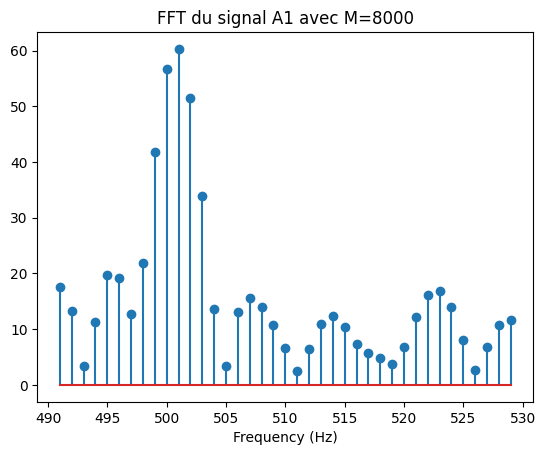

In [95]:
X1 = np.fft.fft(x1, 8000)
V = np.fft.fftfreq(len(X1), 1/Fe)

index = (V > 490) & (V < 530)
plt.stem(V[index], abs(X1[index]))

plt.xlabel("Frequency (Hz)")
plt.title(f"FFT du signal A1 avec M={8000}")
# plt.savefig("images/fft_A1_1.png", dpi=100)
plt.show()
# plt.plot(V, abs(X1))
# plt.xlim([300, 600])

On ajoute un filtre passe-bande de butter d'ordre 6 

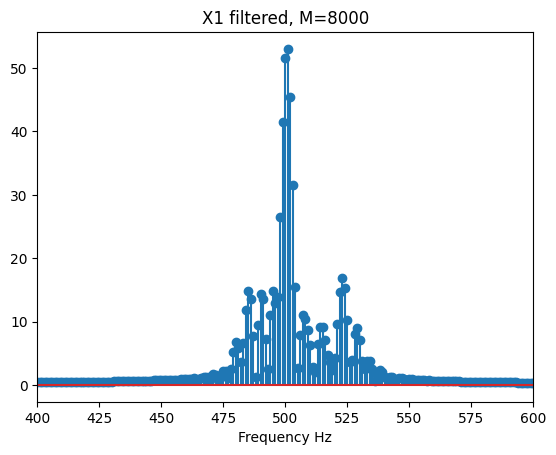

In [129]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

fs = 8000  
lowcut = 480
highcut = 530
x1_filtered = butter_bandpass_filter(x1, lowcut, highcut, fs, order=6)
X1_filtered = np.fft.fft(x1_filtered, Fe)
V1_filtered = np.fft.fftfreq(len(X1_filtered), 1/Fe)
plt.stem(abs(X1_filtered))
plt.xlim([400, 600])
plt.title(f"X1 filtered, M={Fe}")
plt.xlabel("Frequency Hz")
plt.savefig("images/fft_A1_f.png", dpi=300)

#### Analyse du symboleA2.wav

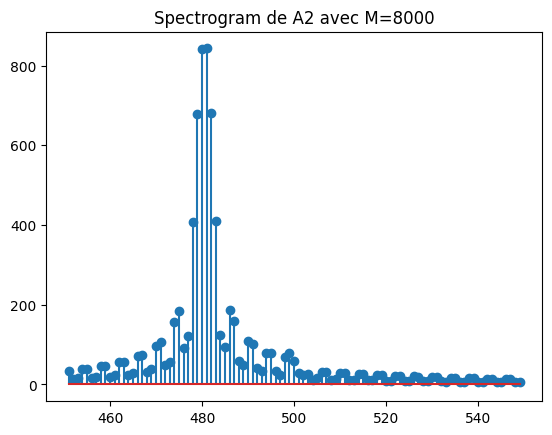

In [200]:
X2 = np.fft.fft(x2, Fe)
V2 = np.fft.fftfreq(len(X2), 1/Fe)
index = (V2 > 450) & (V2 < 550)
plt.stem(V2[index], abs(X2[index]))
plt.title(f"Spectrogram de A2 avec M={Fe}")
plt.savefig("images/fft_A2.png", dpi=300)

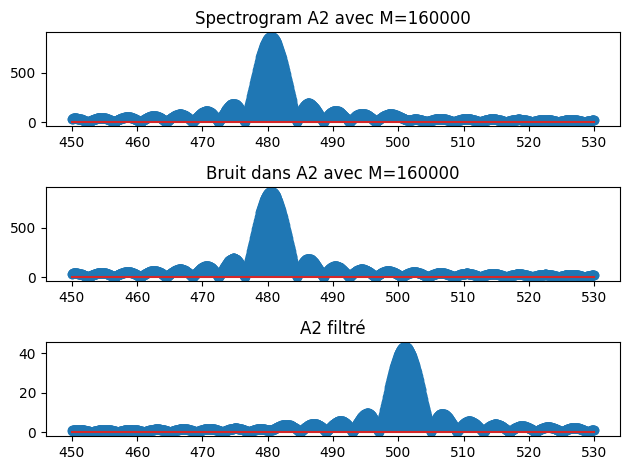

In [201]:
bruits = []  # les bruits enlevés
x_fs = []  # les signaux obtenus 
Bruits = [] 
X_fs = []

def un_symbol(x, Fe=8000):
    # x, Fe = sf.read(filename)
    l = 20*Fe 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]

    while round(v_max) < 501 or round(v_max) > 526:
        t = [i/8000 for i in range(2000)]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*a_max/len(x)*2
        bruits.append(bruit)
        x = x - bruit
        x_fs.append(x)

        X = np.fft.fft(x,l)
        Bruit = np.fft.fft(bruit,l)
        X_fs.append(X)
        Bruits.append(Bruit)

        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
        
    return dic[round(v_max)]

un_symbol(x2)


X2 = np.fft.fft(x2, 20*Fe)
V2 = np.fft.fftfreq(len(X2), 1/Fe)

# plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
index = (V2 > 450) & (V2 < 530)
plt.stem(V2[index], abs(X2[index]))
plt.title(f"Spectrogram A2 avec M={20*Fe}")
# plt.savefig('images/fft_A2_1.png', dpi=300)

plt.subplot(3, 1, 2)
Bruit = Bruits[0]
plt.stem(V2[index], abs(Bruit[index]))
plt.title(f"Bruit dans A2 avec M={20*Fe}")
# plt.savefig("images/fft_A2_bruit.png", dpi=300)

plt.subplot(3, 1, 3)
X2_f = X_fs[0]
plt.stem(V2[index], abs(X2_f[index]))
plt.title(f"A2 filtré")
plt.tight_layout()

plt.savefig("images/A2.png", dpi=300)

In [204]:
np.max(V2)

3999.9500000000003

# Info sans espace

- cut audio
- apply func to every single letter

In [205]:
un_symbol(x1),un_symbol(x2),un_symbol(x3),un_symbol(x4)

('a', 'a', 'u', 'u')

In [7]:
x, _ = sf.read('audiofiles/symboleA.wav')
x

array([-0.05270386,  0.14144897,  0.19720459, ...,  0.05157471,
       -0.01556396, -0.25088501])

In [8]:
x.shape

(2000,)

In [32]:
def un_symbol(x, Fe):
    l = 100*Fe 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]
    while round(v_max) < 501 or round(v_max) > 526:
        t = [i/8000 for i in range(2000)]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*a_max/len(x)*2
        x = x - bruit
        X = np.fft.fft(x,l)
        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
    return round(v_max)

def des_symbols(filename):
    result = ''
    x, Fe = sf.read(filename)
    N = int(len(x)/2500)
    for i in range(N):
        x_ = x[i*2500:(i+1)*2500-500]
        result+=dic[un_symbol(x_,Fe)]
    return result

In [33]:
des_symbols('audiofiles/mess_ssespace.wav')

'cestpasmal'

In [ ]:
un_symbol(x=)

# Avec espace

tried to eliminate useless signal one by one but it didn't work

(480.0, 550.0)

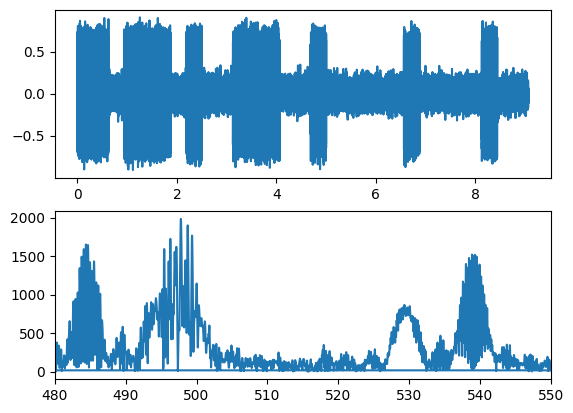

In [17]:
x, Fe = sf.read('audiofiles/mess_difficile.wav')

plt.figure()
t = [i/Fe for i in range(len(x))]
plt.subplot(211)
plt.plot(t,x)

plt.subplot(212)
X = np.fft.fft(x,len(x)*20)
v = np.fft.fftfreq(len(X),1/Fe)
plt.plot(v,np.abs(X))
plt.xlim([480,550])

In [29]:
def un_symbol(x, Fe=8000):
    t0 = time.time()
    l = 100*Fe 
    X = np.fft.fft(x,l)
    v = np.fft.fftfreq(len(X),1/Fe)
    n = np.argmax(abs(X[:int(len(X)/2)]))
    a_max = abs(X)[n]
    v_max = v[n]
    while (round(v_max) < 501 or round(v_max) > 526) and time.time() - t0 < 5:
        t = [i/8000 for i in range(2000)]
        bruit = np.sin([2*np.pi*v_max*i for i in t])*(np.imag(X[n]))/len(x)*2 + np.cos([2*np.pi*v_max*i for i in t])*(np.real(X[n]))/len(x)*2
        x = x - bruit
        X = np.fft.fft(x,l)
        n = np.argmax(abs(X[:int(len(X)/2)]))
        a_max = abs(X)[n]
        v_max = v[n]
    if time.time() - t0 > 1:
        return 0
    return round(v_max)

def des_symbols_espace(x, Fe=8000):
    result = ''
    N = int(len(x)/2500)
    if N == 0: 
        N = 1
    for i in range(N):
        x_ = x[i*2500:(i+1)*2500-500]
        result+=dic[un_symbol(x_,Fe)]
    return result

In [30]:
x, _ = sf.read('audiofiles/symboleA2.wav')

In [31]:
un_symbol(x)

0

In [16]:
x

array([-0.05270386,  0.14144897,  0.19720459, ...,  0.05157471,
       -0.01556396, -0.25088501])